### Nama : Ryan Jusniansyah
### Kelas : A2-22
### NIM : 2209106026
### PT-7

### Import Library

In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os

### Membuat data generator menggunakan ImageDataGenerator

##### disini saya sudah memasukkan data image melalui path folder yang dimana didalamnya terdapat 4 class dan untuk link dataset ada dibawah ini:

##### https://www.kaggle.com/datasets/simbeyedaudi/melon-macronutients-deficiency-images

In [11]:
img_path = "Melon macronutrient deficeincy datasets"

img_datagen = ImageDataGenerator(
    rotation_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='reflect'
)

### Simpan Hasil Augmentation

##### Berguna untuk menaruh perubahan image (semacam ngecompress data) yang akan disimpan didalam folder yang saya beri nama di sini "augmentation", gunanya disini untuk melihat perubahan dari hasil gambar sebelumnya

In [12]:
img_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(200, 200),
    batch_size=25,

    #Parameter Menyimpan data
    class_mode="categorical",
    save_to_dir="augmentation",
    save_prefix="aug",
    save_format="jpg"
)

Found 200 images belonging to 4 classes.


In [13]:
for i in range(4):
    img_generator.next()

### Modeling 

##### ~ Read Data

##### Pada read data, disini kita membuat train dan juga validation model untuk melatih model ini

In [14]:
img_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

Train_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(200,200),
    batch_size=25,
    subset='training',
    class_mode='categorical'
)

val_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(200,200),
    batch_size=25,
    subset='validation',
    class_mode='categorical'
)

test_generator = img_datagen.flow_from_directory(
    img_path,
    target_size=(200,200),
    batch_size=25,
    class_mode='categorical'
)


Found 160 images belonging to 4 classes.
Found 40 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


##### ~ Arsitektur

##### Arsitektur disini berguna untuk melakukan mengisi input, hidden, dan output layer. Disini saya menggunakan input_shape 150x150 pixel dan menggunakan 3 classes karena disini terdapat warna (RGB)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=[200,200,3]),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation="sigmoid")
])

##### Callback disini berguna untuk memberhentikan secara paksa dengan kondisi yang telah ditentukan, disini saya mau accuracy dan validation accuracynya lebih besar sama dengan 0.9. Jadi ketika accuracy dan val_accuracy-nya diatas 0.9 maka training akan dihentikan paksa

In [16]:
class stopTraining(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.9 and logs.get('val_accuracy') >= 0.9):
            self.model.stop_training = True

##### Melakukan Compile pada dataset

In [17]:
model.compile(
    optimizer="Adam",
    loss = "categorical_crossentropy",
    metrics="accuracy"
)

##### Menyimpan fungsi callback kedalam variable

In [18]:
myCallback = stopTraining()

##### Melatih model 

In [19]:
history = model.fit(
    Train_generator,
    validation_data = val_generator,
    epochs = 50,
    callbacks=[myCallback]
)

Epoch 1/50
7/7 [==============================] - 102s 14s/step - loss: 1.4675 - accuracy: 0.2750 - val_loss: 1.2338 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 89s 13s/step - loss: 0.9195 - accuracy: 0.7063 - val_loss: 0.8890 - val_accuracy: 0.7500
Epoch 3/50
7/7 [==============================] - 88s 12s/step - loss: 0.5389 - accuracy: 0.7625 - val_loss: 0.4269 - val_accuracy: 0.8000
Epoch 4/50
7/7 [==============================] - 90s 13s/step - loss: 0.2171 - accuracy: 0.9125 - val_loss: 0.4721 - val_accuracy: 0.9250


##### Disini terdapat evaluasi model yang dimana berguna sebagai patokan dari training model pada saat melakukan pelatihan model

In [20]:
model.evaluate(val_generator)

2/2 [==============================] - 6s 2s/step - loss: 0.4721 - accuracy: 0.9250


[0.4720814824104309, 0.925000011920929]

##### Visualisasi model dengan visual garis, untuk menampilkan perbandingan train dan validation accuracy dan juga training dan validation lossnya.

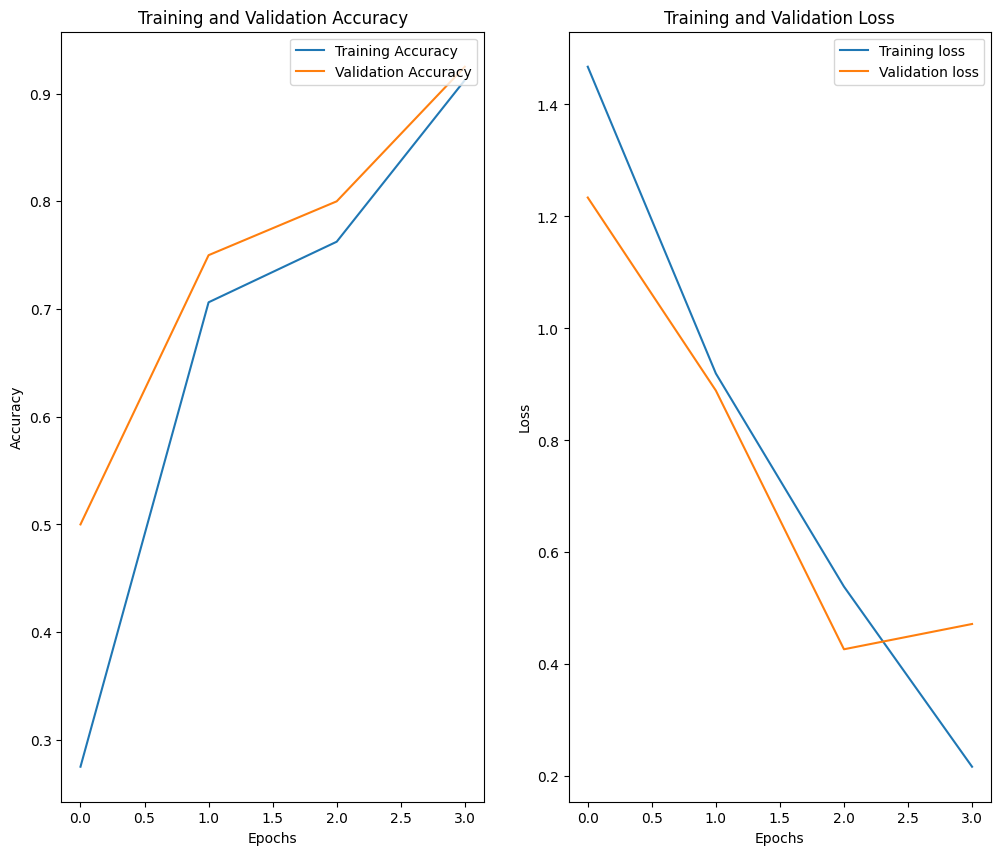

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()